# Logistic Regression

1. Import neccessary libraries and create the dataset

In [279]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics 

#Import x and y
x = np.genfromtxt(fname="hw6x.dat")
y = np.genfromtxt(fname="hw6y.dat")
#Create matrix from y
y=y[:,np.newaxis]
#Format our data
a, b = x.shape[0], x.shape[1]
x = np.append(np.ones((a,1)), x ,axis=1)
y = y.reshape(a,1)
pos, neg = (y==1).reshape(99,1), (y==0).reshape(99,1)

2. Implement the gradient descent method for optimizing l(theta) and apply it to fit a logistic regression model to the data. 

In [280]:
#Sigma calculation based on formula
def sigma(z):
    return 1/ (1 + np.exp(-z))

#Takes theta, x, y and returns cost and gradient
def cross(theta, x, y): 
    prob = sigma(np.dot(x,theta))
    #Calculate error
    err = (-y * np.log(prob)) - ((1-y)*np.log(1-prob))
    #Get gradient and cost
    gradient = 1/len(y) * np.dot(x.transpose(),(prob - y)) 
    cost = 1/len(y) * sum(err)  
    return cost[0] , gradient

#Set our initial theta to 0's and get our first cost and gradient
thetaFirst = np.zeros((b+1,1))

#Performs our gradient descent
def gradientDescent(x, y, theta, learnRate, iterations):
    c_hist =[]
    for i in range(iterations):
        cost, gradient = cross(theta,x,y)
        theta = theta - (learnRate * gradient)
        c_hist.append(cost)
    return theta , c_hist

#Get our theta and print
theta, c_hist = gradientDescent(x, y, thetaFirst, .01, 500)
print(theta)

[[-0.3107306 ]
 [ 0.24267985]
 [ 0.91334178]]


3. Implement Newton's method to maximize l(theta) and compare the overall running time and number of iterations needed to converge to the same precision

[[-1.458436  ]
 [ 0.50939077]
 [ 1.12517742]]


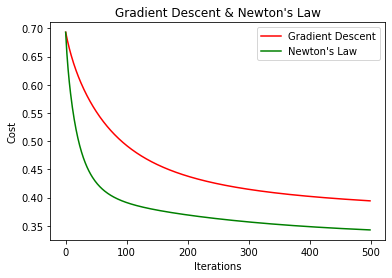

In [281]:
#Newton Method
def Newton(theta, x, y):
    prob = sigma(np.dot(x,theta))
    com = 1 - prob
    hessian = np.dot(prob.transpose(),com)
    #Calculate error
    err = (-y * np.log(prob)) - ((1-y)*np.log(1-prob))
    #Get gradient and cost
    gradient = np.dot(x.transpose(),(prob - y))
    cost = 1/len(y) * sum(err)  
    return cost[0] , gradient, hessian

def gradientDescentNewton (x, y, theta, learnRate, iterations):
    c_hist =[]
    for i in range(iterations):
        cost, gradient, hessian = Newton(theta,x,y)
        theta = theta - (learnRate * (gradient*(1/(hessian))))
        c_hist.append(cost)
    return theta , c_hist

#Get our theta and print (Newton)
thetaFirstNewt = np.zeros((b+1,1))
thetaNewton, c_histNewton = gradientDescentNewton(x, y, thetaFirstNewt, .01, 500)

print(thetaNewton)

#Plot showing faster convergence by newton's law
plt.plot(c_hist, "r", label = "Gradient Descent")
plt.plot(c_histNewton,"g",label = "Newton's Law")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent & Newton's Law")
plt.legend()
plt.show()

4. Plot the training data (your axes should correspond to the two coordinates of the inputs, and you should use a different symbol for each point plotted to indicate whether that example had label 1 or 0). Also plot on the same figure the decision boundary fit by logistic regression. 

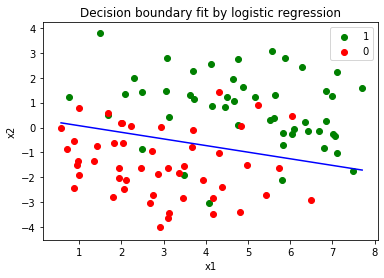

In [285]:
#Scatter plot 1's as green and 0's as red
plt.scatter(x[pos[:,0],1], x[pos[:,0],2],c="g",label="1")
plt.scatter(x[neg[:,0],1], x[neg[:,0],2],c="r",label="0")
#Calculate our decision boundary
xdecision = np.array([np.min(x[:,1]), np.max(x[:,1])])
ydecision =- (theta[0] + theta[1] * xdecision) / theta[2]
plt.title("Decision boundary fit by logistic regression")
plt.plot(xdecision, ydecision, "b")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=0)
plt.show()

5. Compute the Area under ROC curve (AUC) score of your trained classifier

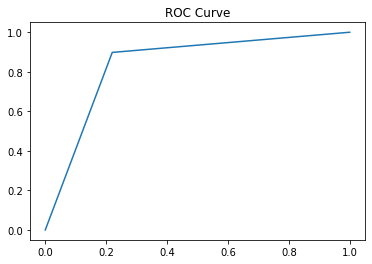

AUC Score: 0.8389795918367348


In [284]:
#Classify our data with theta
def classifier(theta,X):
    classify = X.dot(theta)
    return classify > 0

classifierResults = classifier(theta,x)

#Get the fpr and tpr
fpr, tpr, threshold = metrics.roc_curve(y, classifierResults)

#Plot ROC curve
plt.title("ROC Curve")
plt.plot(fpr,tpr)
plt.show() 

#Get AUC value
auc = np.trapz(tpr,fpr)
print("AUC Score:", auc)